# NGC 6441 Analysis - optical data

In [1]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
from astropy.io import fits
import optical
import lightcurves
%matplotlib inline 

In [2]:
target = 'NGC6441'
folder = '/Volumes/Annie/CRRP/'+target+'/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'
cluster_ra = '17:50:12.84'
cluster_dec = '-37:03:03.9'

# Variable stars

In [ ]:
# Find all stars identified as possible variables in optical catalog and list them in PeterIDs.txt

center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
optical.find_variables_fnl(optical_dir, target, center_ra, center_dec, data_dir=folder)

# Period Search

### Read in variables from Clement catalog

In [3]:
dtype1 = np.dtype([('id', 'S10'), ('period', float)])
data = np.loadtxt(folder+target+'-clement.txt', dtype=dtype1, usecols=(0,3))

datasets, colors = optical.compile_datasets(folder, old=0, returnColors=True)



Datasets:

  1      Y0706  53401 2007-06-06 2007-06-12 k
  2       bart  21785 1998-05-26 1998-06-04 r
  3       andy  15585 1996-05-22 1996-07-02 b
  4      Y0704  14339 2007-03-31 2007-04-12 g
  5       wfi5   3631 2002-06-18 2002-06-21 m
  6      B0708   3550 2007-08-11 2007-08-13 c
  7      wfi13   2858 2003-06-06 2003-06-06 xkcd:brown
  8      B0608   1802 2006-08-24 2006-08-24 xkcd:coral
  9  fors20602    734 2006-02-28 2006-02-28 xkcd:purple
 10       manu    727 2000-06-07 2000-06-07 xkcd:maroon
 11      fors2    446 2001-07-12 2001-07-12 xkcd:olive
 12  fors20605    439 2006-05-29 2006-05-29 xkcd:tan
 13        yon    295 2008-05-04 2008-05-04 xkcd:grey


In [4]:
# Find periods for all stars in clement catalog

print '\n\nStar  Period_old  Period_new'

for ind, lcv in enumerate(data['id']):

# Open file to save periods
    if ind == 0:
        f_handle = open(folder+'periods.txt', 'w')
    else:
        f_handle = open(folder+'periods.txt', 'a')

    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    clement_period = data['period'][data['id'] == lcv]
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file)
        new_guess, guess_snr = lightcurves.period_search_LS(V, lcv, plot_save=1, data_dir=folder)
        period_diff = np.abs(new_guess - clement_period)
        if period_diff < 0.01 and np.isnan(clement_period) == 0:
            new_period = lightcurves.period_search(V, new_guess, second_band=B, search_window=0.00005)
            lightcurves.plot_phased_optical_lcv(U, B, V, R, I, new_period, lcv, datasets, plot_save=1,data_dir=folder, colors=colors)

        else:
            new_period = lightcurves.period_search(V, new_guess, second_band=B, search_window=0.00005)
            second_period = lightcurves.period_search(V, clement_period, second_band=B, search_window=0.0001) 
            lightcurves.plot_phased_optical_lcv(U, B, V, R, I, new_period, lcv, datasets, plot_save=1,data_dir=folder, colors=colors)
            lightcurves.plot_phased_optical_lcv(U, B, V, R, I, second_period, lcv+'c', datasets, plot_save=1,data_dir=folder, colors=colors)

        print '%10s %0.4f %0.8f %0.2f' % (lcv, clement_period, new_period, guess_snr)
        f_handle.write('%10s %0.4f %0.8f\n' % (lcv, clement_period, new_period))

    except IOError:
        new_period = np.nan
        print '%10s %0.4f %0.8f %7s' % (lcv, clement_period, new_period, 'No data')
        f_handle.write('%10s %0.4f %0.8f %10s\n' % (lcv, clement_period, new_period, '# no data'))        

    except:
        new_period = np.nan
        print '%10s %0.4f %0.8f' % (lcv, clement_period, new_period)
        f_handle.write('%10s %0.4f %0.8f\n' % (lcv, clement_period, new_period))

    # Close the periods file
    f_handle.close()



Star  Period_old  Period_new


/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


       V36 0.5078 0.50144210 5.40
       V37 0.6140 0.61337960 18.11
       V38 0.7350 0.73459000 29.15
       V39 0.8330 0.83291900 26.46
       V40 0.6480 0.79725400 3.91
       V41 0.7490 0.99589600 34.53
       V42 0.8130 0.81265300 22.39
       V43 0.7730 0.77308700 33.55
       V44 0.6090 0.96979300 16.26
       V45 0.5030 0.33487010 19.29
       V46 0.9000 0.90450500 24.64
       V49 0.3350 0.33509300 24.61
       V51 0.7130 0.71354700 20.17
       V52 0.8580 0.97499900 56.67
       V53 0.8530 0.96983500 13.68
       V54 0.6200 0.62118890 14.88
       V55 0.6980 0.69748600 19.93
       V56 0.9050 0.99472200 27.10
       V57 0.6960 0.69379400 28.62
       V58 0.6850 0.68536200 8.53
       V59 0.7030 0.97499000 41.52
       V60 0.8570 0.99589800 29.05
       V61 0.7500 0.73740700 25.33
       V62 0.6800 0.67996400 10.30
       V63 0.7000 0.69916700 15.10
       V64 0.7180 0.99865200 20.22
       V65 0.7570 0.97502800 16.28
       V66 0.8600 0.97770500 17.03
       V67 0.6540 0.653

V109 0.3646


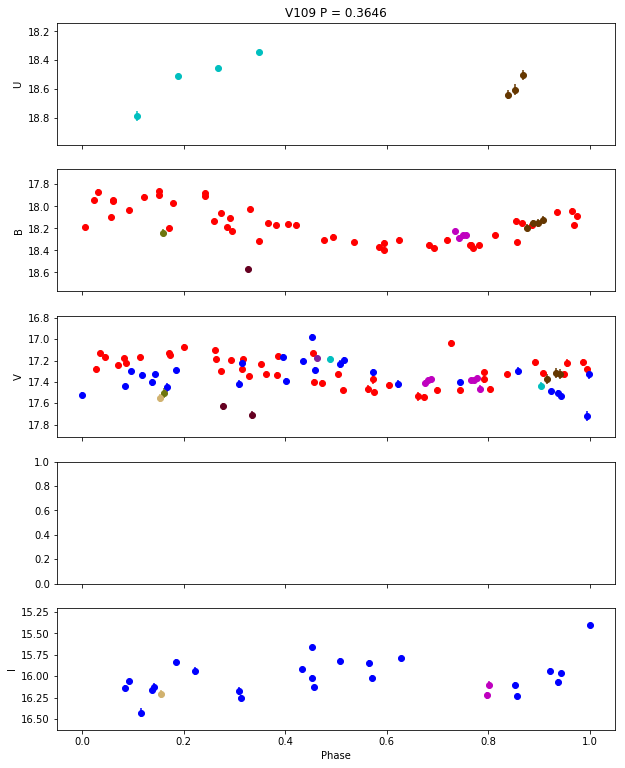

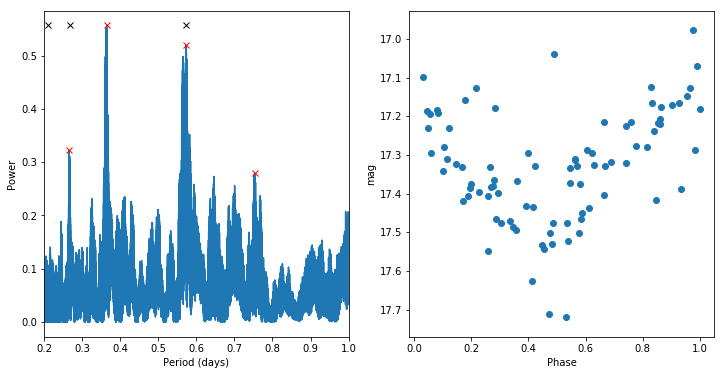

0.364175906465


In [6]:
### For single star
ind=50
print data['id'][ind], data['period'][ind]
lcv = data['id'][ind]
initial_period = data['period'][ind]
lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'

U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, initial_period, lcv, datasets, error_threshold=0.05, colors=colors)

# broad Lomb Scargle
new_guess, best_snr = lightcurves.period_search_LS(V, lcv)
print new_guess

Star  Period  Period_new
V109 0.3646 0.364051


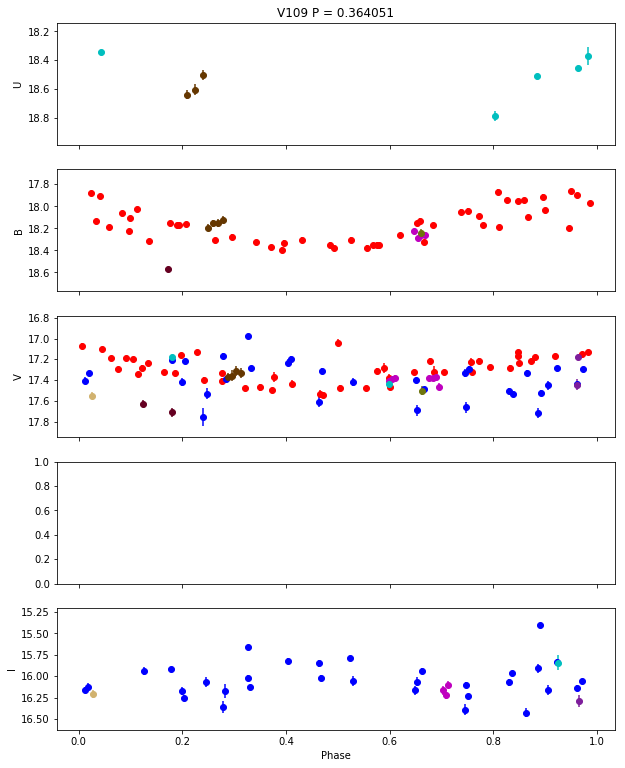

In [8]:
period = lightcurves.period_search(V, new_guess, second_band=B, search_window=0.001)
print 'Star  Period  Period_new'
print lcv, initial_period, period
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, lcv, datasets, error_threshold=0.1, colors=colors)


# Search for other variable candidates

In [14]:
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
catalog_data, dist = optical.read_fnl_w_radial_dist(optical_dir, target, center_ra, center_dec)

#dtype1 = np.dtype([('id', 'S8'), ('period', float), ('var_type', 'S5')])
dtype1 = np.dtype([('id', 'S8'), ('ra', 'S13'), ('dec', 'S13')])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,9,10))

Reading optical catalog for NGC3201...
Finished reading optical catalog.


Datasets:

     Y0701  95202 2007-01-13 2007-01-23 k
    lcogt2  69985 2013-03-14 2013-03-23 r
     Y0704  24334 2007-03-31 2007-04-13 b
    zingle  15701 1996-04-16 1996-04-19 g
      lee4  11616 2012-02-18 2012-02-23 m
     west1  11444 2005-02-11 2005-02-13 c
     wfi13  10623 2003-06-04 2003-06-06 xkcd:brown
    lcogt3   9918 2014-03-02 2014-03-02 xkcd:coral
    ct1204   8009 2012-04-24 2012-04-24 xkcd:purple
  efosc08a   7693 2008-04-19 2008-04-19 xkcd:maroon
     bond6   7436 1998-04-17 1998-04-22 xkcd:olive
      wfi6   6815 2002-02-20 2002-02-20 xkcd:tan
     B1201   6727 2012-01-06 2012-01-11 xkcd:grey
     wfi22   5403 2000-02-27 2000-02-27 xkcd:teal
efosc1101b   5379 2011-01-21 2011-01-21 xkcd:tomato
      lee2   5052 2011-05-30 2011-06-03 xkcd:orchid
     wfi41   4855 2012-02-24 2012-02-27 xkcd:goldenrod
     wfi11   4648 1999-12-05 1999-12-05 xkcd:orange
     west2   4238 2005-05-05 2005-05-05 xkcd:

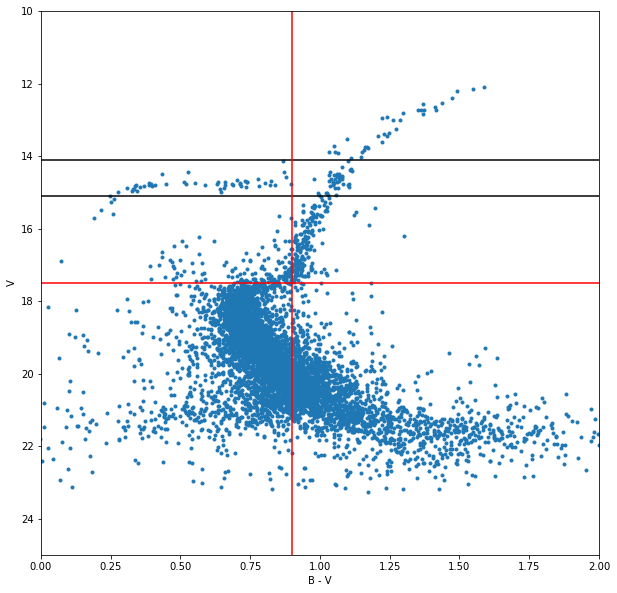

In [18]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')
# Define HB
HB_lower = 15.1
HB_upper = 14.1
mp.axhline(HB_lower, color='k')
mp.axhline(HB_upper, color='k')
#Define GB
GB_red = 0.9
GB_lower = 17.5
mp.axvline(GB_red, color='r')
mp.axhline(GB_lower, color='r')

88 candidate RRL stars.
123 candidate variables on GB.
386 other candidate variables.


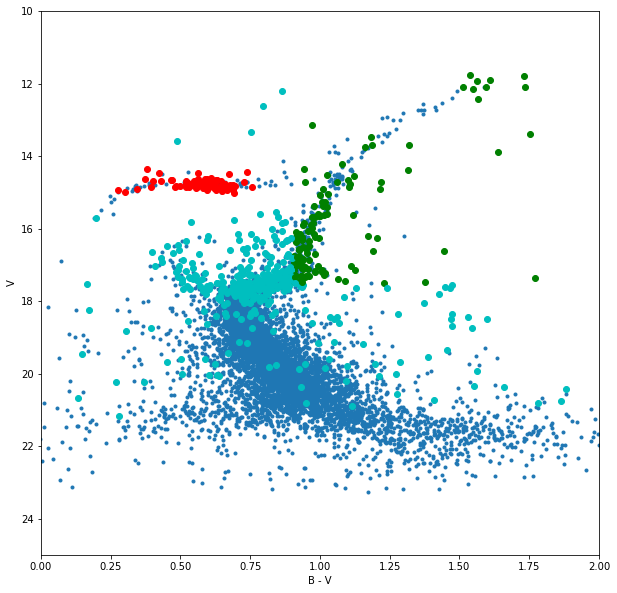

In [19]:
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')

type_var = np.zeros(len(data['id']), dtype='S4')
for ind, lcv in enumerate(data['id']):
    
    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    except:
        type_var[ind] ='ND'
        continue

    color_var = np.nanmean(B[0]) - np.nanmean(V[0])
    mag_var = np.nanmean(V[0])

    
    if (mag_var <= HB_lower and mag_var >= HB_upper and color_var <= GB_red):
        type_var[ind] = 'RRL'
        mp.plot(color_var, mag_var, 'ro')
    elif (mag_var <= GB_lower and color_var >= GB_red):
        type_var[ind] = 'GB'
        mp.plot(color_var, mag_var, 'go')
    else:
        type_var[ind] = 'OTH'
        mp.plot(color_var, mag_var, 'co')

RRL_candidates = data['id'][type_var == 'RRL']
print str(len(RRL_candidates))+' candidate RRL stars.'
GB_variables = data['id'][type_var == 'GB']
print str(len(GB_variables))+' candidate variables on GB.'
other_variables = data['id'][type_var == 'OTH']
print str(len(other_variables))+' other candidate variables.'

In [ ]:
for ind, star in enumerate(other_variables):
    print ind, star, data['ra'][data['id'] == star], data['dec'][data['id'] == star]

In [ ]:
ind = 24
lcv_name = other_variables[ind]
#lcv_name = RRL_candidates[ind]
#lcv_name = 'V60'
lcv_file = folder+'lcvs/optical/'+target+lcv_name+'.lcv'
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
#print lcv_name, data['var_type'][ind], data['period'][ind]
#cc_period = data['period'][ind]
print lcv_name

In [ ]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')


color_var = np.mean(B[0]) - np.mean(V[0])
mag_var = np.mean(V[0])
mp.plot(color_var, mag_var, 'ro')
mp.show()

# remove data with large error bars
error_threshold = 0.1
V[0][V[1] > error_threshold] = np.nan
V[1][V[1] > error_threshold] = np.nan

lightcurves.plot_raw_optical_lcv(V)

# Find best dataset to use
sources_prefix = np.zeros(len(V[3]), dtype='S30')
for ind, string in enumerate(V[3]):
    sources_prefix[ind] = string.split(':')[0]
sources, counts = np.unique(sources_prefix, return_counts=True)
best_source = sources[counts == np.max(counts)]

num_obs_in_run = len(V[0][sources_prefix == best_source])
longest_dataset = np.zeros((4, num_obs_in_run), dtype=object)
longest_dataset[0][:] = V[0][sources_prefix == best_source]
longest_dataset[1][:] = V[1][sources_prefix == best_source]
longest_dataset[2][:] = V[2][sources_prefix == best_source]
longest_dataset[3][:] = V[3][sources_prefix == best_source]

lightcurves.plot_raw_optical_lcv(longest_dataset)


# find night with the most data

obs_times = np.array(longest_dataset[2], dtype=float)
nights = np.round(obs_times, 0)
uniq_nights, counts = np.unique(nights, return_counts=True)
order = np.argsort(counts)
best_nights = uniq_nights[order]
best_night = uniq_nights[counts == np.max(counts)][0]
num_obs_in_night = len(V[2][nights == best_night])

longest_night = np.zeros((4, num_obs_in_night), dtype=object)
longest_night[0][:] = longest_dataset[0][nights == best_night]
longest_night[1][:] = longest_dataset[1][nights == best_night]
longest_night[2][:] = longest_dataset[2][nights == best_night]
longest_night[3][:] = longest_dataset[3][nights == best_night]


lightcurves.plot_raw_optical_lcv(longest_night)

In [ ]:
candidate_periods = variables.candidate_variables(V, lcv_name, min_period=0.1, max_period=0.9, grid_num=1000)



In [ ]:
for period in candidate_periods:
    if period == 0:
        continue
    lightcurves.plot_phased_optical_one_band(V, period, lcv_name, datasets)